In [1]:
%matplotlib inline
from pylab import *

In [2]:
from classy import *

Version  1.0.6
Version:  0.0.31


In [3]:
data_train=double_moon_data(d=-2,N=1000)
data_test=double_moon_data(d=-2,N=200)

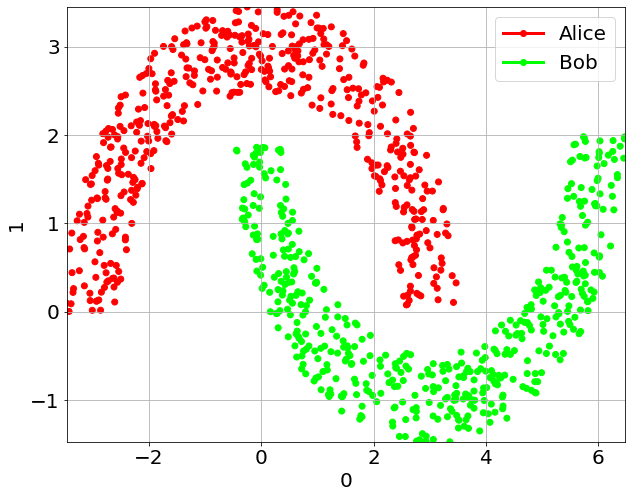

In [4]:
plot2D(data_train)

## no hidden layer, linear units = Perceptron

In [6]:
C=NumPyNetBackProp({
    'input':2,               # number of features
    'output':(2,'linear'),  # number of classes
    'cost':'mse',
})

# activation functions - linear, tanh (-1 to 1), logistic (0 to 1), relu (min 0, linear)

In [7]:
C.fit(data_train.vectors,data_train.targets,epochs=3000)

layer       filters  size              input                output
   0 input                  1000 x   1 x   1 x   2   ->  1000 x   1 x   1 x   2
   1 connected              1000 x   1 x   1 x   2   ->  1000 x   2
   2 cost                   1000 x   1 x   1 x   2   ->  1000 x   1 x   1 x   2


100%|██████████████████████████████████████████████████████████| 3000/3000 [00:03<00:00, 977.79it/s]


In [8]:
print((C.predict(data_test.vectors)))
print(("On Train`ing Set:",C.percent_correct(data_train.vectors,data_train.targets)))
print(("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets)))

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1
 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1]
('On Train`ing Set:', 86.2)
('On Test Set:', 85.5)


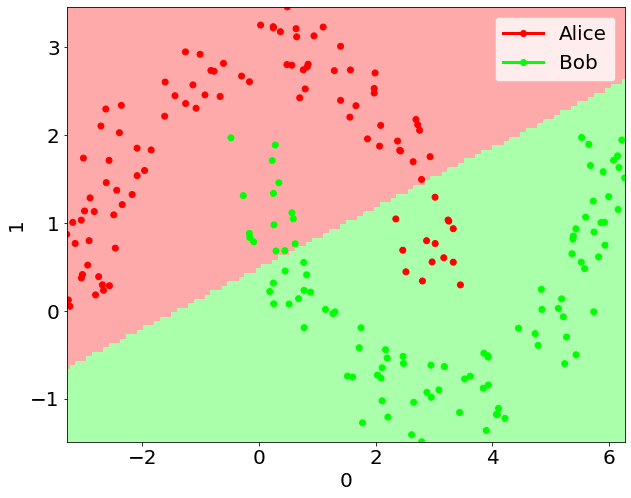

In [9]:
plot2D(data_test,classifier=C)

In [10]:
data=load_excel('data/iris.xls')

iris.data 151 5
150 vectors of length 4
Feature names: 'petal length in cm', 'petal width in cm', 'sepal length in cm', 'sepal width in cm'
Target values given.
Target names: 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'
Mean:  [3.75866667 1.19866667 5.84333333 3.054     ]
Median:  [4.35 1.3  5.8  3.  ]
Stddev:  [1.75852918 0.76061262 0.82530129 0.43214658]


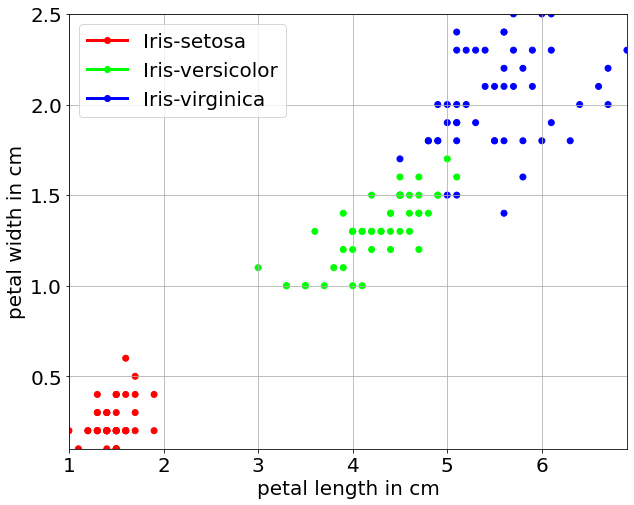

In [11]:
subset=extract_features(data,[0,1])
plot2D(subset)

In [13]:
data_train,data_test=split(subset,test_size=0.2)

Original vector shape:  (150, 2)
Train vector shape:  (120, 2)
Test vector shape:  (30, 2)


In [14]:
C=NumPyNetBackProp({
    'input':2,               # number of features
    'output':(3,'linear'),  # number of classes
    'cost':'mse',
})

# activation functions - linear, tanh (-1 to 1), logistic (0 to 1), relu (min 0, linear)

In [15]:
C.fit(data_train.vectors,data_train.targets,epochs=3000)

layer       filters  size              input                output
   0 input                   120 x   1 x   1 x   2   ->   120 x   1 x   1 x   2
   1 connected               120 x   1 x   1 x   2   ->   120 x   3
   2 cost                    120 x   1 x   1 x   3   ->   120 x   1 x   1 x   3


100%|█████████████████████████████████████████████████████████| 3000/3000 [00:02<00:00, 1182.54it/s]


In [16]:
print((C.predict(data_test.vectors)))
print(("On Training Set:",C.percent_correct(data_train.vectors,data_train.targets)))
print(("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets)))

[0 2 0 2 2 1 2 0 2 0 0 0 2 2 2 2 2 2 0 1 2 0 2 2 2 2 0 2 2 2]
('On Training Set:', 70.83333333333334)
('On Test Set:', 63.33333333333333)


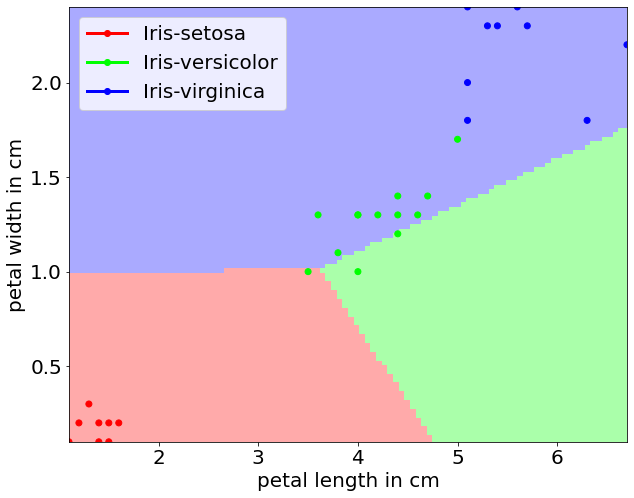

In [17]:
plot2D(data_test,classifier=C)

## Backprop with hidden units

In [18]:
data_train=double_moon_data(d=-2,N=1000)
data_test=double_moon_data(d=-2,N=200)

In [19]:
C=NumPyNetBackProp({
    'input':2,               # number of features
    'hidden':[(15,'logistic'),],
    'output':(2,'logistic'),  # number of classes
    'cost':'mse',
})

In [20]:
C.fit(data_train.vectors,data_train.targets,epochs=6000)

layer       filters  size              input                output
   0 input                  1000 x   1 x   1 x   2   ->  1000 x   1 x   1 x   2
   1 connected              1000 x   1 x   1 x   2   ->  1000 x  15
   2 connected              1000 x   1 x   1 x  15   ->  1000 x   2
   3 cost                   1000 x   1 x   1 x   2   ->  1000 x   1 x   1 x   2


100%|██████████████████████████████████████████████████████████| 6000/6000 [00:11<00:00, 502.44it/s]


In [21]:
print((C.predict(data_test.vectors)))
print(("On Training Set:",C.percent_correct(data_train.vectors,data_train.targets)))
print(("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets)))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
('On Training Set:', 100.0)
('On Test Set:', 100.0)


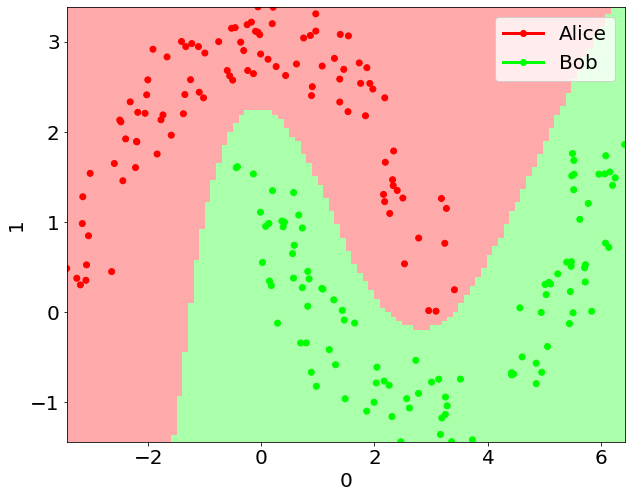

In [22]:
plot2D(data_test,classifier=C)